# Clustering_Mini_Project_3

## Project Brief Clustering - Mall Customers Segmentation

### Mall Customers Segmentation

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc).

### Business Objective

●To create Customer cluster to identify the different types of customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [2]:
cust_d= pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
cust_d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cust_data=cust_d.copy()

In [4]:
col = ['Gender']
for i in col:
    cust_data[i] = cust_data[i].astype('category')

In [5]:
label_encoder = preprocessing.LabelEncoder()
for i in col:
    cust_data[i] = label_encoder.fit_transform(cust_data[i])

In [6]:
cust_data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [7]:
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## VISUALIZATION

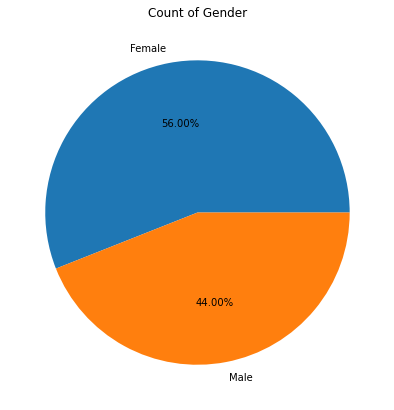

In [8]:
fig= plt.subplots( figsize = (15, 7))
plt.title("Count of Gender")                        
percentage = cust_d["Gender"].value_counts()         
labels = list(cust_d["Gender"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

In [9]:
#### Females are Higher than Males

<AxesSubplot:xlabel='Age', ylabel='Count'>

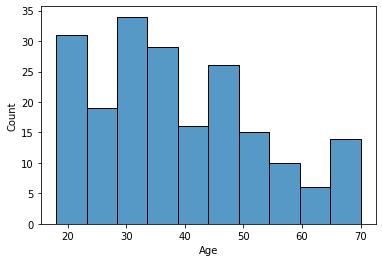

In [10]:
sb.histplot(cust_data['Age'],bins=10)

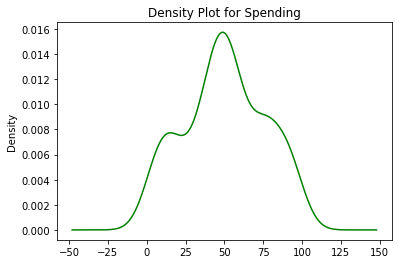

In [11]:
cust_data["Spending Score (1-100)"].plot.density(color='green')
plt.title('Density Plot for Spending')
plt.show()

Spending Score 50 has high Density

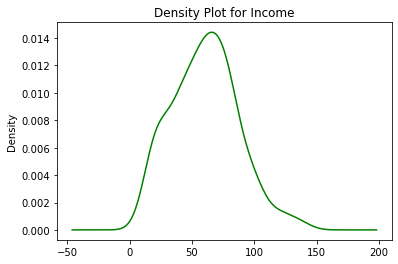

In [12]:
cust_data["Annual Income (k$)"].plot.density(color='green')
plt.title('Density Plot for Income')
plt.show()

Annual income 60-70 has High Density

<AxesSubplot:xlabel='Annual Income (k$)'>

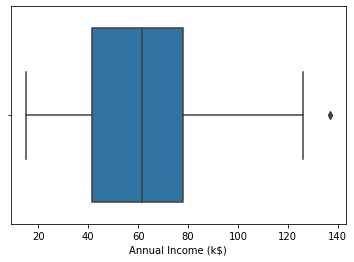

In [13]:
sb.boxplot(cust_data["Annual Income (k$)"])

In [14]:
#### Income contains only one outlier

<AxesSubplot:xlabel='Spending Score (1-100)'>

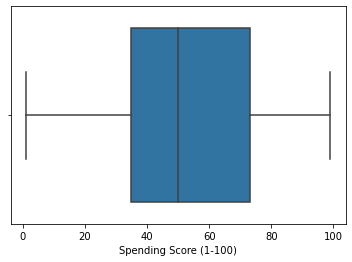

In [15]:
sb.boxplot(cust_data["Spending Score (1-100)"])

In [16]:
#### Spending Score contains only no outlier

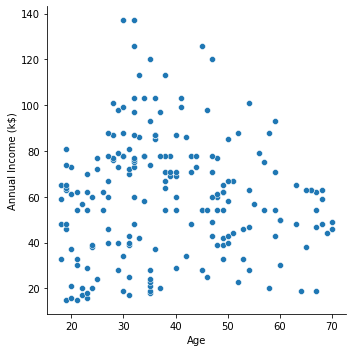

In [17]:
sb.relplot(cust_data["Age"],cust_data["Annual Income (k$)"])

#### 25-40 Age Groups have High Annual Income

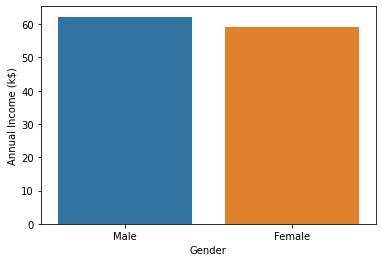

In [18]:
sb.barplot(data = cust_d,x = "Gender",  y = 'Annual Income (k$)',estimator=np.mean,ci=None)
plt.show()

#### Males have High Annual Income

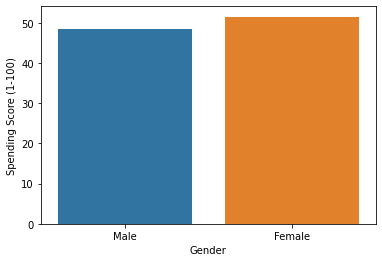

In [19]:
sb.barplot(data = cust_d,x = "Gender",  y = 'Spending Score (1-100)',estimator=np.mean,ci=None)
plt.show()

Females have High Spending Score

# 1st Method

In [20]:
x=cust_data.iloc[:,[3,4]].values

In [21]:
from sklearn.cluster import KMeans
errors=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

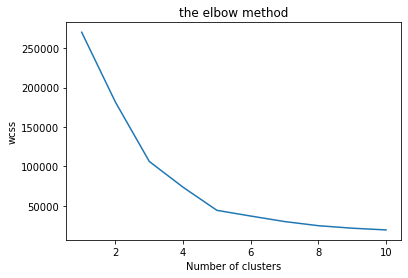

In [22]:
plt.plot(range(1,11) ,errors)
plt.title("the elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(x)

Text(0, 0.5, 'Spending Score (1-100)')

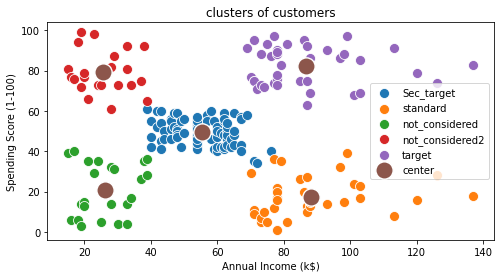

In [24]:
plt.figure(figsize=(8,4))
sb.scatterplot(x=x[y_kmeans==0,0] ,y=x[y_kmeans==0,1] ,s=100,label="Sec_target")
sb.scatterplot(x=x[y_kmeans==1,0] ,y=x[y_kmeans==1,1],s=100,label="standard")
sb.scatterplot(x=x[y_kmeans==2,0] ,y=x[y_kmeans==2,1] ,s=100,label="not_considered")
sb.scatterplot(x=x[y_kmeans==3,0] ,y=x[y_kmeans==3,1],s=100,label="not_considered2")
sb.scatterplot(x=x[y_kmeans==4,0] ,y=x[y_kmeans==4,1],s=100,label="target")
sb.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [25]:
clusters=[]
for c in y_kmeans:
    if c==0:
        clusters.append("Sec_target")
    elif c==1:
        clusters.append("standard")
    elif c==2:
        clusters.append("not_considered")
    elif c==3:
        clusters.append("not_considered2")
    elif c==4:
        clusters.append("target") 
        
        
cust_data["clusters"]=clusters 

In [26]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,not_considered
1,2,1,21,15,81,not_considered2
2,3,0,20,16,6,not_considered
3,4,0,23,16,77,not_considered2
4,5,0,31,17,40,not_considered


In [27]:
final_cust=cust_data[(cust_data['clusters']=='target')| (cust_data['clusters']=='Sec_target')]

In [28]:
final_cust.shape

(120, 6)

In [29]:
final_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
43,44,0,31,39,61,Sec_target
46,47,0,50,40,55,Sec_target
47,48,0,27,40,47,Sec_target
48,49,0,29,40,42,Sec_target
49,50,0,31,40,42,Sec_target
...,...,...,...,...,...,...
191,192,0,32,103,69,target
193,194,0,38,113,91,target
195,196,0,35,120,79,target
197,198,1,32,126,74,target


There are 120 in total Customers to which offers and services should be given

# 2nd Method

## AgglomerativeClustering

In [30]:
cust_data= pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
#cust_data

In [31]:
col = ['Gender']
for i in col:
    cust_data[i] = cust_data[i].astype('category')

In [32]:
label_encoder = preprocessing.LabelEncoder()
for i in col:
    cust_data[i] = label_encoder.fit_transform(cust_data[i])

In [33]:
X=cust_data.iloc[:,[3,4]].values

In [48]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

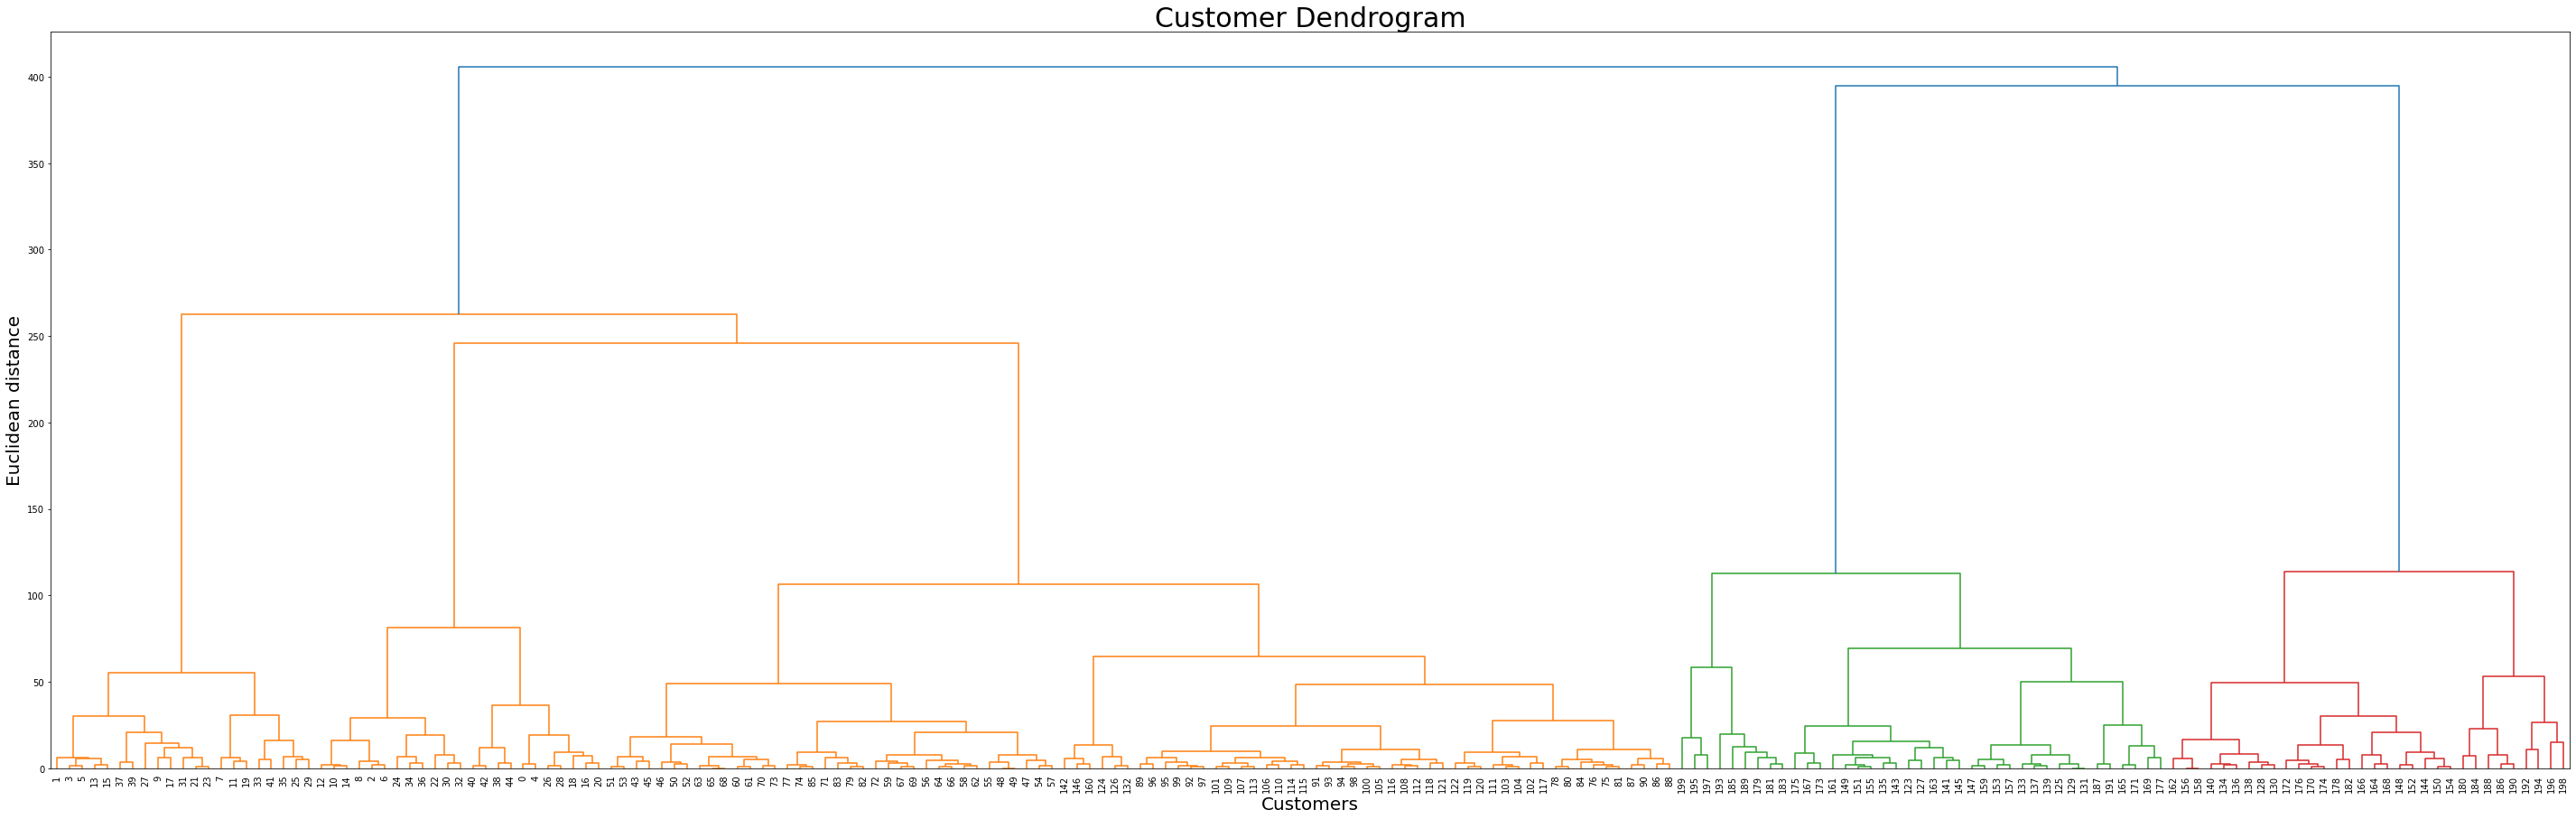

In [34]:
plt.figure(figsize=(50, 15))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=cust_data.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

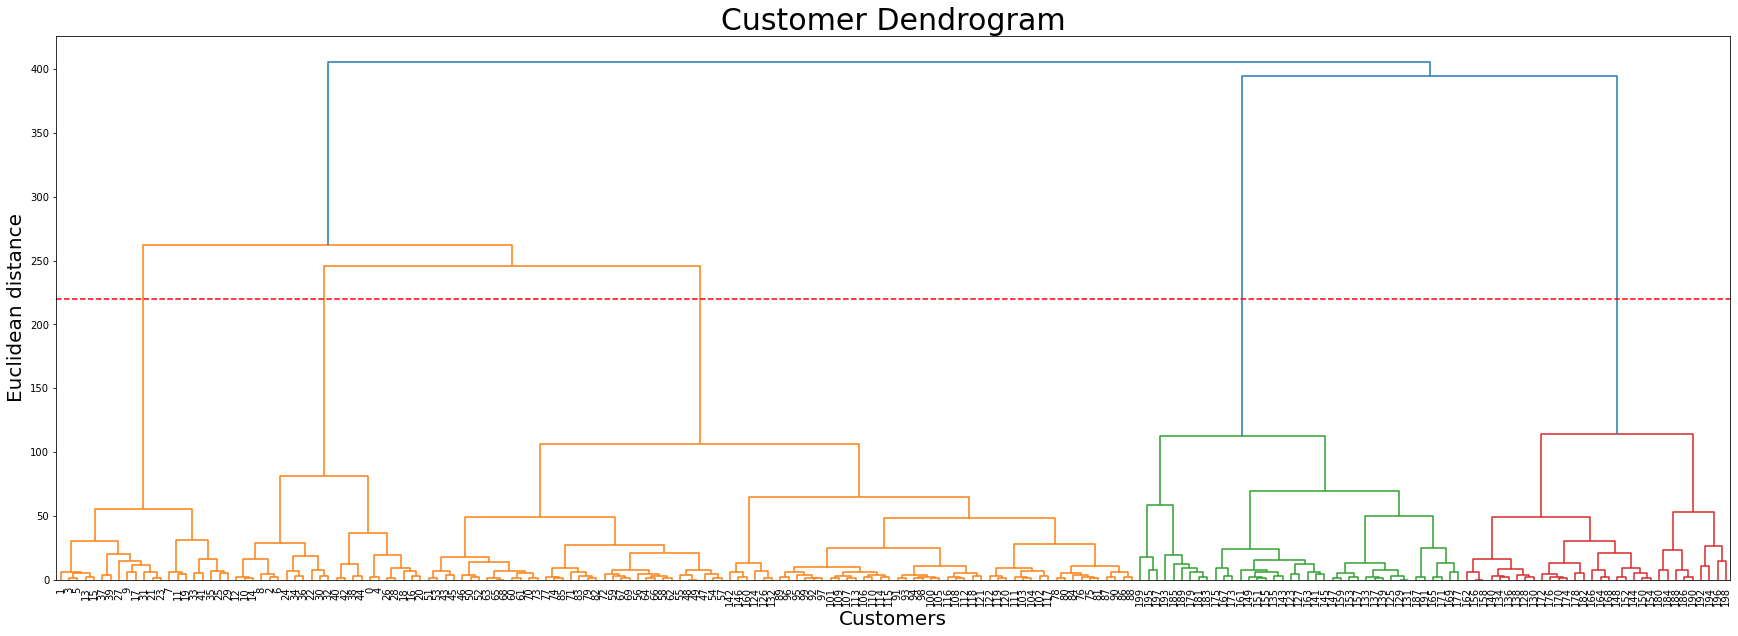

In [35]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=cust_data.index)
plt.axhline(y=220, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

## Model Building

In [36]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

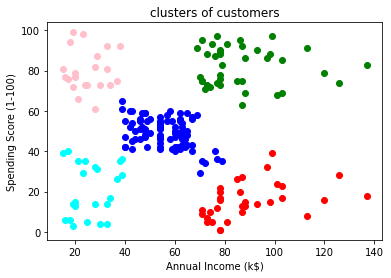

In [37]:
#X = cust_data.iloc[:,[3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], c='red')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], c='blue')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], c='g')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], c='pink')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], c='cyan')
plt.title("clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [38]:
clusters=[]
for c in y_hc:
    if c==0:
        clusters.append("not_considered")
    elif c==1:
        clusters.append("Sec_target")
    elif c==2:
        clusters.append("target")
    elif c==3:
        clusters.append("not_considered2")
    elif c==4:
        clusters.append("Standard") 
        
        
cust_data["clusters"]=clusters 

In [39]:
final_cust1=cust_data[(cust_data['clusters']=='target')| (cust_data['clusters']=='Sec_target')]

In [40]:
final_cust1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
43,44,0,31,39,61,Sec_target
45,46,0,24,39,65,Sec_target
46,47,0,50,40,55,Sec_target
47,48,0,27,40,47,Sec_target
48,49,0,29,40,42,Sec_target
...,...,...,...,...,...,...
191,192,0,32,103,69,target
193,194,0,38,113,91,target
195,196,0,35,120,79,target
197,198,1,32,126,74,target


In [41]:
#main_cust= pd.DataFrame()
#main_cust['CustomerID']=a
#main_cust['Annual Income (k$)']=b
#main_cust['Spending Score (1-100)']=d
#main_cust

In [42]:
#e=X[y_hc==3, 0] #pink
#len(e)

In [43]:
#f=X[y_hc==2, 0] #green
#len(f)

In [44]:
#g=X[y_hc==2, 0] #green
#len(g)

In [45]:
#r=X[y_hc==0, 0]
#r

In [46]:
#i=X[y_hc==0, 1]
#i

### TARGETED CUSTOMER

In [47]:
final_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
43,44,0,31,39,61,Sec_target
46,47,0,50,40,55,Sec_target
47,48,0,27,40,47,Sec_target
48,49,0,29,40,42,Sec_target
49,50,0,31,40,42,Sec_target
...,...,...,...,...,...,...
191,192,0,32,103,69,target
193,194,0,38,113,91,target
195,196,0,35,120,79,target
197,198,1,32,126,74,target


#### Considering K-Means as its showing good clusters, so there are 120 customers in total as targeted customer to which offers and services should be provided.